

# Project: Investigate a Dataset Medical Appointment No Shows


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


> In this project we'll be analysing data from Medical Appointment No Show dataset from kaggle.com. This dataset consists of
110.527 medical appointments, and  14  variables. Here is a list of variables:

>    - 01 - PatientId : Identification of a patient
>    - 02 - AppointmentID : Identification of each appointment
>    - 03 - Gender : Male or Female 
>    - 04 - ScheduledDay : The day of the actuall appointment, when they have to visit the doctor.
>    - 05 - AppointmentDay : The day someone called or registered the appointment, this is before appointment of course.
>    - 06 - Age : How old is the patient.
>    - 07 - Neighbourhood : Where the appointment takes place.
>    - 08 - Scholarship : True of False 
>    - 09 - Hipertension : True or False
>    - 10 - Diabetes : True or False
>    - 11 - Alcoholism : True or False
>    - 12 - Handcap : True or False
>    - 13 - SMS_received : 1 or more messages sent to the patient.
>    - 14 - No-show : True or False( No stands for patient showing up)

> In this report we will look how patients who did not appear on scheduled appointment differ from patients who appeared.Most important variable is No_show and analysis will be focused on this variable and its relation with day of the week, 
patient gender and also with data if patient did or did not recieve sms notification about appointment.


###               Questions:
>       1. Is day of week associeted with patients showing up?
>       2. Do female on average show up more then male?
>       3. Do patients who recieve SMS increse average show up rate?
>       4. Is age associeted with show up rate?

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# loading data
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

In [3]:
# inspect dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There is 110527 records and 14 columns, with no missing data

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning 

In [6]:
#column names to lowercase
df.columns = df.columns.str.lower()

 Since there is a value -1 in age column, we should drop those values

In [7]:
# locate row with age value < 0
df[df["age"]<0]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [8]:
#delete row with age -1
df.drop([99832], axis=0, inplace =True)

In [9]:
# check if we have some missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   patientid       110526 non-null  float64
 1   appointmentid   110526 non-null  int64  
 2   gender          110526 non-null  object 
 3   scheduledday    110526 non-null  object 
 4   appointmentday  110526 non-null  object 
 5   age             110526 non-null  int64  
 6   neighbourhood   110526 non-null  object 
 7   scholarship     110526 non-null  int64  
 8   hipertension    110526 non-null  int64  
 9   diabetes        110526 non-null  int64  
 10  alcoholism      110526 non-null  int64  
 11  handcap         110526 non-null  int64  
 12  sms_received    110526 non-null  int64  
 13  no-show         110526 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


There is no missing value

In [10]:
# convert to datetime format
df["scheduledday"]=pd.to_datetime(df["scheduledday"])

In [11]:
df["scheduledday"]=df["scheduledday"].dt.strftime("%Y-%m-%d")

In [12]:
df["scheduledday"]=df["scheduledday"].astype('datetime64')

In [13]:
df["appointmentday"]=pd.to_datetime(df["appointmentday"])

In [14]:
df["appointmentday"]=df["appointmentday"].dt.strftime("%Y-%m-%d")


In [15]:
df["appointmentday"]=df["appointmentday"].astype('datetime64')


In [16]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


appointmentday and scheduledday columns are converted to datatime format

In [17]:
# no need for patientid and appointmentis  columns so we are going to drop them
df.drop(["patientid","appointmentid"], axis=1, inplace = True)


In [18]:
# edit "no-show" column name to "no_show"
df["no_show"]=df["no-show"]
df.drop(["no-show"],axis = 1, inplace=True)


In [19]:
# column names
df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'no_show'],
      dtype='object')

In [20]:
#add new column with week day name, for scheduled day and appointment day
df["app_day_of_week"] = pd.to_datetime(df["appointmentday"]).dt.day_name()
df["sch_day_of_week"] = pd.to_datetime(df["scheduledday"]).dt.day_name()

In [21]:
# change values in no_show to 0 and 1, where 0 stands for showing up and 1 for not showing up
df.no_show = df.no_show.map({"No": 0 ,"Yes": 1})

In [22]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,app_day_of_week,sch_day_of_week
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,Friday
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday,Friday
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday,Friday
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday,Friday
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday,Friday


<a id='eda'></a>
## Exploratory Data Analysis






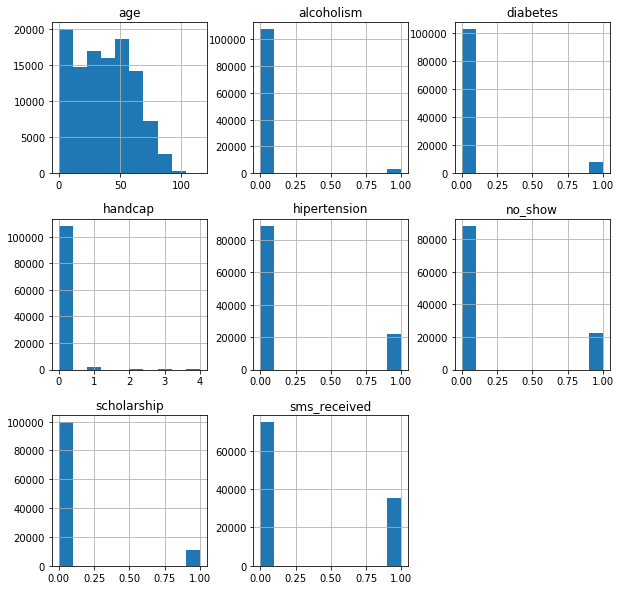

In [23]:
# first let's see the histogram for all variables
df.hist(figsize=(10,10));

In [24]:
# Since we are exploring data about people who didn't appear, let' first check their ratio
prc_no_show=(len(df.query("no_show == True"))/len(df))*100
prc_no_show

20.193438647919944

About 20% of patients did not appear at scheduled time

In [25]:
# Creating mask for easy use
showed = df.no_show == False
notshowed = df.no_show == True

### Question 1 : Is day of week associeted with patients showing up?


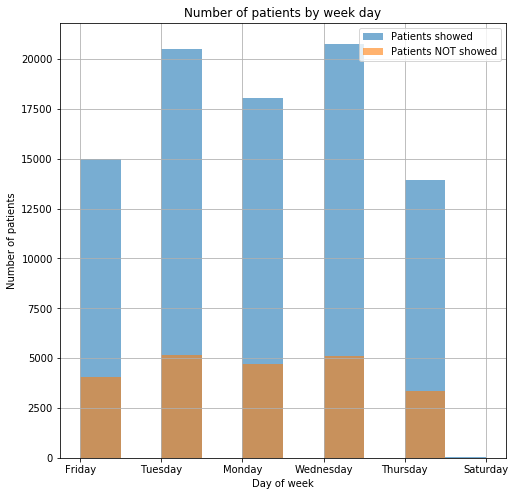

In [26]:
# plot histagram patient show status by day of the week
df.query("no_show == 0")["app_day_of_week"].hist(label = "Patients showed", alpha = 0.6, figsize =(8,8))
df.query("no_show == 1")["app_day_of_week"].hist(label = "Patients NOT showed", alpha = 0.6);
plt.xlabel("Day of week")
plt.ylabel("Number of patients")
plt.title("Number of patients by week day")
plt.legend();

In [27]:
#let's group by days of the week to check if there is any difference of patients showing status
df.groupby("app_day_of_week")["no_show"].mean()

app_day_of_week
Friday       0.212261
Monday       0.206481
Saturday     0.230769
Thursday     0.193541
Tuesday      0.200936
Wednesday    0.196892
Name: no_show, dtype: float64

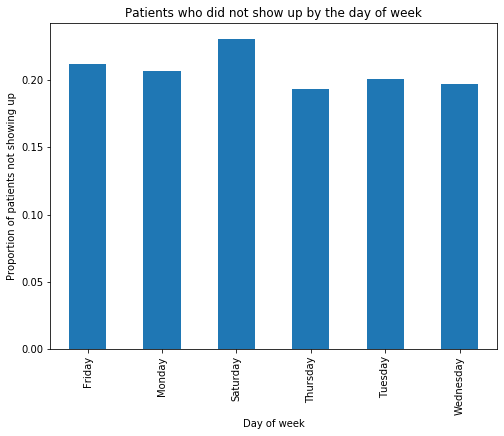

In [28]:
df.groupby("app_day_of_week")["no_show"].mean().plot(kind="bar", figsize=(8,6));
plt.xlabel("Day of week")
plt.ylabel("Proportion of patients not showing up")
plt.title("Patients who did not show up by the day of week");

 It looks like there is no difference in percentige of patients not showing up according to the day of the week

### Question 2: Do female on average show up more then male?

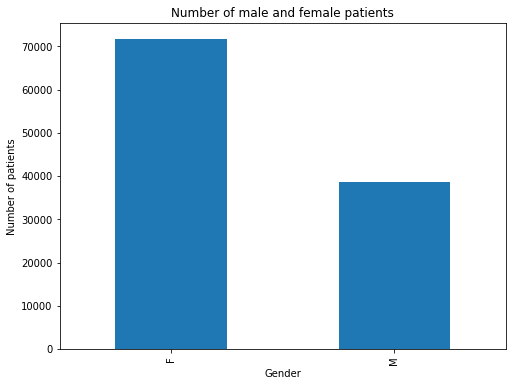

In [29]:
# plot bar chart
df.gender.value_counts().plot(kind = "bar", figsize = (8,6));
plt.title("Number of male and female patients")
plt.xlabel("Gender")
plt.ylabel("Number of patients");


In [30]:
# Male patients rate
len(df.query("gender == 'M'"))/len(df)

0.3500262381702043

35% of patients are male

In [31]:
# Female patients rate
len(df.query("gender == 'F'"))/len(df)

0.6499737618297957

65% of patients are female

In [32]:
# group data by gender to get proportion of male and female patients who did not show up
df.groupby("gender")["no_show"].mean()

gender
F    0.203149
M    0.199679
Name: no_show, dtype: float64

20,3% of female patients did not show up, 20% of male patients did not show up

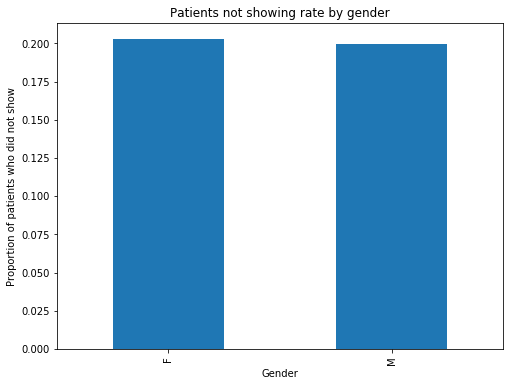

In [33]:
# plot bar chart
df.groupby("gender")["no_show"].mean().plot(kind="bar",figsize = (8,6));
plt.xlabel("Gender")
plt.ylabel("Proportion of patients who did not show")
plt.title("Patients not showing rate by gender");


As we can see from bar chart and data above, proportion of female and male patients who did not show up is almost same

### Question 3 : Do patients who recieve SMS increse average show up rate?

In [34]:
# proportion of patients who recieved SMS 
len(df.query("sms_received == 1"))/len(df)

0.3210285362720084

32,1% patients recieved SMS notification

In [35]:
# proportion of patients who did not recieved SMS
len(df.query("sms_received == 0"))/len(df)

0.6789714637279916

67,9% patients did not receive SMS notification 

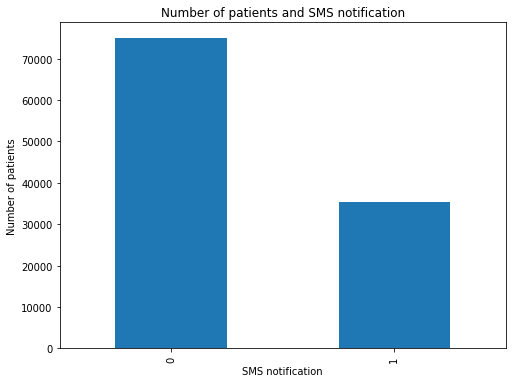

In [36]:
# plot number of patients who did or did not recieve SMS notification
df.sms_received.value_counts().plot(kind="bar", figsize = (8,6));
plt.xlabel("SMS notification")
plt.ylabel("Number of patients")
plt.title("Number of patients and SMS notification");

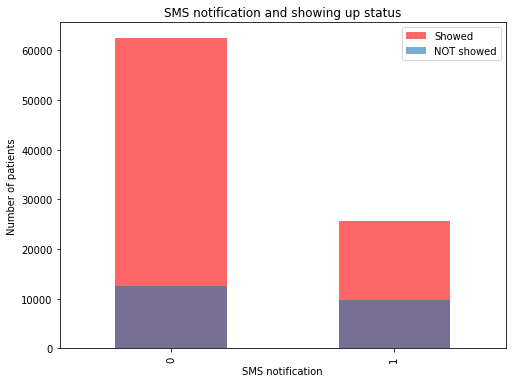

In [37]:
df[showed]["sms_received"].value_counts().plot(kind="bar", label="Showed", alpha = 0.6, color="red");
df[notshowed]["sms_received"].value_counts().plot(kind="bar", label="NOT showed", alpha = 0.6, figsize=(8,6));
plt.legend()
plt.title("SMS notification and showing up status")
plt.xlabel("SMS notification")
plt.ylabel("Number of patients");

In [38]:
# proportion of patients receiving SMS notification
df.groupby("no_show")["sms_received"].mean()

no_show
0    0.291337
1    0.438371
Name: sms_received, dtype: float64

29,1% patients who did show recieved SMS notification
43,8% patients who did not show recieved SMS notification

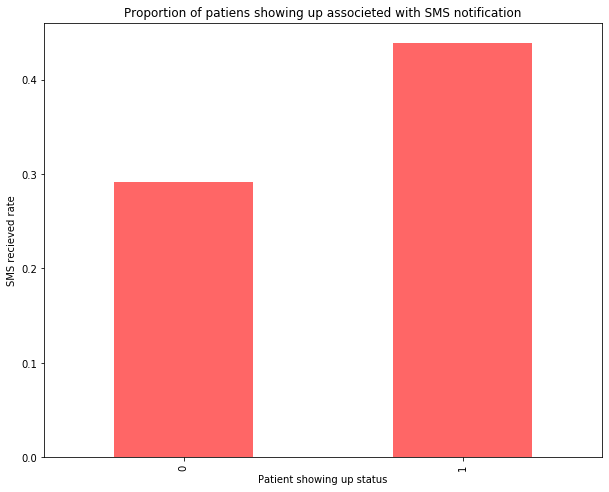

In [39]:
df.groupby("no_show")["sms_received"].mean().plot(kind="bar", alpha = 0.6, color="red", figsize=(10,8));
plt.xlabel("Patient showing up status")
plt.ylabel("SMS recieved rate")
plt.title("Proportion of patiens showing up associeted with SMS notification");

Patients who receive SMS notification in average did not show up, and we would expect to be opposite

### Question 4 : Is age associeted with show up rate?

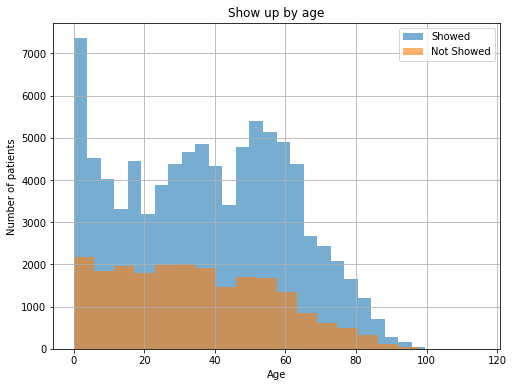

In [40]:
df.age[showed].hist(bins=30, alpha = 0.6, label = "Showed", figsize = (8,6))
df.age[notshowed].hist(bins=20, alpha = 0.6, label = "Not Showed");
plt.title("Show up by age")
plt.xlabel("Age")
plt.ylabel("Number of patients")
plt.legend();

In [41]:
# grouping ages to six groups
bins = [0, 20, 40, 50, 60, 70,120]
labels = ['<20', '20-39', '40-49', '50-59', '60-69', '70+']
df['age_group'] = pd.cut(df.age, bins, labels = labels,include_lowest = True)


In [42]:
# proportion of patients who did not show by age group
df.groupby("age_group")["no_show"].mean()

age_group
<20      0.222808
20-39    0.229790
40-49    0.199029
50-59    0.173744
60-69    0.147288
70+      0.158404
Name: no_show, dtype: float64

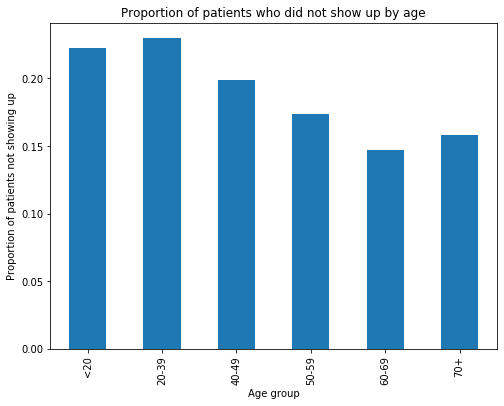

In [43]:
# ploting bar chart for above proportions
df.groupby("age_group")["no_show"].mean().plot(kind="bar", figsize=(8,6))
plt.title("Proportion of patients who did not show up by age")
plt.xlabel("Age group")
plt.ylabel("Proportion of patients not showing up");

From the  graph, we can can see that difference in proportion of patients who did not show up and those who showed up is getting smaller with older patients

## Conclusions

From analysis above, we can conclude that patients showing up status is not associated with their gender, or by day of the week. Also, we can see that proportion of older patients who did not show up is smaller than proportion of younger patients who did not show up. Surprisingly,  patients who did receive SMS notification about their appointment, more likely did not show up.